In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r"D:\Titanic_predictions\train.csv")
test_data = pd.read_csv(r"D:\Titanic_predictions\test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

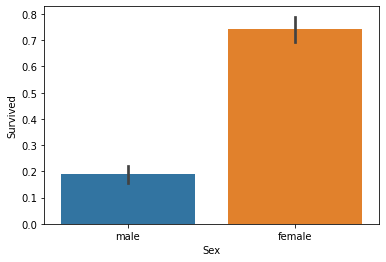

In [7]:
sns.barplot(x='Sex' , y='Survived', data=train_data)

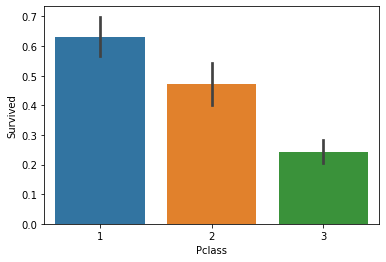

In [8]:
sns.barplot(x='Pclass' , y='Survived', data=train_data)

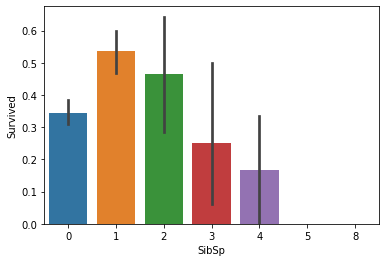

In [9]:
sns.barplot(x='SibSp' , y='Survived', data=train_data)

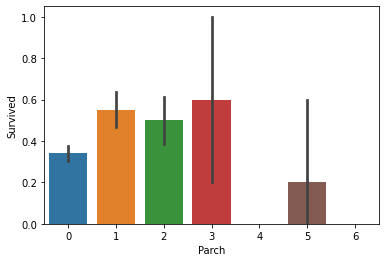

In [10]:
sns.barplot(x='Parch' , y='Survived', data=train_data)

In [11]:
import numpy as np

In [12]:
bins= [0,5,10,18,24,35,50,np.inf]

In [13]:
labels = ['baby', 'kid', 'teen','student','young','adult','senior']

In [14]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins , labels=labels)

In [15]:
import matplotlib.pyplot as plt

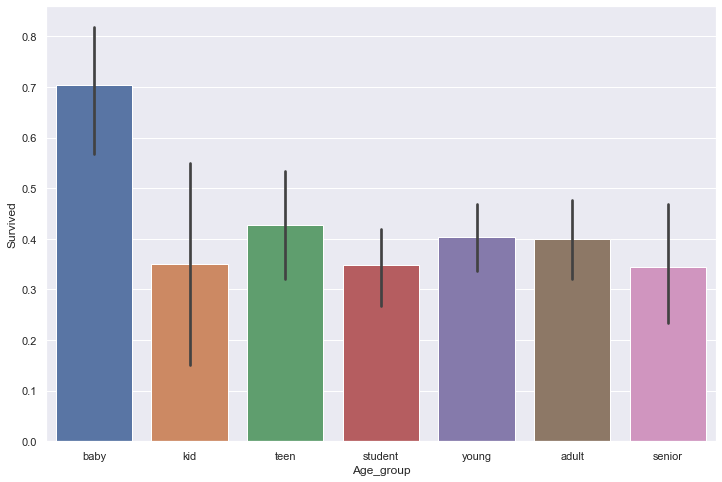

In [16]:
sns.set()
plt.figure(figsize = (12,8))
sns.barplot(x="Age_group", y="Survived", data=train_data)
plt.show()

In [17]:
print(f'Number of people living in Southampton are(S){train_data[train_data["Embarked"]=="S"].shape[0]}')
print(f'Number of people living in Cherbourg are(S){train_data[train_data["Embarked"]=="C"].shape[0]}')
print(f'Number of people living in Queenstown are(S){train_data[train_data["Embarked"]=="Q"].shape[0]}')

Number of people living in Southampton are(S)644
Number of people living in Cherbourg are(S)168
Number of people living in Queenstown are(S)77


In [18]:
train_data.fillna({"Embarked":"S"},inplace=True)

In [19]:
train_data.drop("Name",axis=1,inplace=True)

In [20]:
train_data['Age'] = train_data['Age'].fillna(train_data.groupby('Sex')['Age'].transform('mean'))

In [21]:
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,1,student
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2,adult
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,young
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,1,young
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,1,young


In [23]:
train_data.drop("Age_group",axis=1,inplace=True)
train_data.drop("Ticket",axis=1,inplace=True)

In [24]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,1
1,2,1,1,1,38.0,1,0,71.2833,C85,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,1
3,4,1,1,1,35.0,1,0,53.1000,C123,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,1


In [25]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
test_data.drop("Cabin",axis=1,inplace=True)

test_data.drop("Name",axis=1,inplace=True)

test_data['Fare']=test_data["Fare"].fillna(test_data["Fare"].mean())

test_data['Age'] = test_data['Age'].fillna(test_data.groupby('Sex')['Age'].transform('mean'))

In [28]:
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [29]:
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

In [30]:
test_data.drop("Ticket",axis=1,inplace=True)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,7.2500,NaN,1
1,2,1,1,1,38.0,1,0,71.2833,C85,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,1
3,4,1,1,1,35.0,1,0,53.1000,C123,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,1


In [32]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,3
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,3
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [33]:
train_data.drop("Cabin",axis=1,inplace=True)

In [34]:
x= train_data.drop(["PassengerId","Survived"],axis=1) 
y= train_data["Survived"]

x.shape,y.shape

((891, 7), (891,))

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracyscore
np.random.seed(42)

rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc_preds= rfc.predict(x_test)

accuracy_score(y_test,rfc_preds)

NameError: name 'accuracy_score' is not defined